In [1]:
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
"LLMs-from-scratch/main/ch02/01_main-chapter-code/"
"the-verdict.txt")
file_path = "the-verdict.txt"
urllib.request.urlretrieve(url, file_path)

('the-verdict.txt', <http.client.HTTPMessage at 0x10399aad0>)

In [2]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [3]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [4]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [5]:
result = [item for item in result if item.strip()]
result

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']

In [6]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
print(result)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'Is', ' ', 'this', '--', '', ' ', 'a', ' ', 'test', '?', '']
['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [7]:
# applying it to the dataset
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
len(preprocessed)

4690

In [8]:
preprocessed[:10]

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius']

In [9]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
vocab_size

1130

In [10]:
vocab = {token:integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [11]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text) # to numerical values 
        preprocessed = [
        item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids): # back to natural language
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [12]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [13]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [14]:
text = "Hello, do you like tea?"
print(tokenizer.encode(text)) # error due to the text is not in training set. The word 'hello' not used in the short story 'The verdict'

KeyError: 'Hello'

In [15]:
# adding special context tokens :- that is we add <|unk|> to new or unknown words while <|endoftext|> for sentence completionb

In [16]:
# modifying the vocabulary 
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

1132


In [17]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [18]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [
        item.strip() for item in preprocessed if item.strip()
        ]
        preprocessed = [item if item in self.str_to_int
        else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [19]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [20]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text)) # 1131 = <|unk|> and 1130 = <|endoftext|>

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [21]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


In [27]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.9.0


In [28]:
tik_tokenizer = tiktoken.get_encoding('gpt2')

In [29]:
text = (
"Hello, do you like tea? <|endoftext|> In the sunlit terraces"
"of someunknownPlace."
)
integers = tik_tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [30]:
string = tokenizer.decode(integers)
string

KeyError: 15496

In [31]:
unk = "Akwirw ier."
print(tik_tokenizer.encode(unk))

[33901, 86, 343, 86, 220, 959, 13]


In [32]:
print(tokenizer.decode(tik_tokenizer.encode(unk)))

KeyError: 33901

In [33]:
# now tokenize the short story dataset using the BPE tokenizer
enc_text = tik_tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [34]:
enc_sample = enc_text[50:]
len(enc_sample)

5095

In [35]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [36]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [40]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

KeyError: 4920

In [41]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        token_ids = tik_tokenizer.encode(txt)
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    def __len__(self):
        return len(self.input_ids)
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

/Users/arjunkrishna/base/lib/python3.13/site-packages/torch/_subclasses/functional_tensor.py:276: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [42]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
stride=128, shuffle=True, drop_last=True,
num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
                            dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            drop_last=drop_last,
                            num_workers=num_workers
    )
    return dataloader

In [43]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [44]:
second_batch = next(data_iter)
second_batch

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]

In [45]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4,
    shuffle=False
    )
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [46]:
# token IDs into token embedding vectors

input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 6
output_dim = 3
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [47]:
print(embedding_layer(torch.tensor([3]))) # embedding vector

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [48]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [138]:
# usefull embdng sizes and encode the input tokens into a
# 256-dimensional vector representation, which is smaller than what the original GPT-3
# model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable
# for experimentation. furthermore, we assume that the token IDs were created by the
# BPE tokenizer we implemented earlier, which has a vocabulary size of 50,257:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [50]:
max_length = 4
dataloader = create_dataloader_v1(
raw_text, batch_size=8, max_length=max_length,
stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [51]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [52]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [53]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [54]:
# self-attention intro

In [55]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # your     (x^1)
 [0.55, 0.87, 0.66], # journey  (x^2)
 [0.55, 0.87, 0.66], # starts   (x^3)
 [0.22, 0.58, 0.33], # with     (x^4)
 [0.77, 0.25, 0.10], # one      (x^5)
 [0.05, 0.80, 0.55]] # step     (x^6)
)

In [142]:
inputs.shape[1]

3

In [56]:
x_2 = inputs[1] 
d_in = inputs.shape[1] # input embedding size , d = 3
d_out = 2 # output embedding size

In [57]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [58]:
W_query

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])

In [59]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [60]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [61]:
keys

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4433, 1.1419],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])

In [62]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22) # unnormalized attention score

tensor(1.8524)


In [63]:
attn_scores_2 = query_2 @ keys.T # computaton to all attention scores
print(attn_scores_2) # 2nd element matches we computed prev (attn_scores_22)

tensor([1.2705, 1.8524, 1.8524, 1.0795, 0.5577, 1.5440])


In [66]:
d_k = keys.shape[-1] 
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1) # qk^T / root_dk(dim of the key matrix)
print(attn_weights_2)

tensor([0.1490, 0.2249, 0.2249, 0.1302, 0.0900, 0.1808])


In [67]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3082, 0.8267])


In [68]:
# compact self-attention class

In [69]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
        
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax( attn_scores / keys.shape[-1]**0.5, dim=-1 )
        context_vec = attn_weights @ values
        return context_vec

In [70]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs)) # inputs contains 6 embedding vectors , results in a matrix storing 6 context vectors

tensor([[0.3015, 0.8104],
        [0.3082, 0.8267],
        [0.3082, 0.8267],
        [0.2965, 0.7986],
        [0.2944, 0.7936],
        [0.3009, 0.8091]], grad_fn=<MmBackward0>)


In [71]:
# self-attention using linear layer.
# instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear
# has an optimized weight initialization scheme, contributing to more stable and
# effective model training.

In [72]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax( attn_scores / keys.shape[-1]**0.5, dim=-1 )
        context_vec = attn_weights @ values
        return context_vec

In [73]:
torch.manual_seed(123)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs)) # SelfAttention_v1 and SelfAttention_v2 give different outputs because
                     # they use different initial weights for the weight matrices since nn.Linear uses a more
                     # sophisticated weight initialization scheme.

tensor([[-0.5340, -0.1049],
        [-0.5326, -0.1078],
        [-0.5326, -0.1078],
        [-0.5300, -0.1074],
        [-0.5313, -0.1064],
        [-0.5302, -0.1079]], grad_fn=<MmBackward0>)


In [74]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
                                # Reuses the query and key weight matrices
                                # of the SelfAttention_v2 object from the
                                # previous section for convenience
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1716, 0.1762, 0.1762, 0.1555, 0.1626, 0.1579],
        [0.1635, 0.1749, 0.1749, 0.1611, 0.1604, 0.1651],
        [0.1635, 0.1749, 0.1749, 0.1611, 0.1604, 0.1651],
        [0.1636, 0.1703, 0.1703, 0.1651, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1722, 0.1617, 0.1633, 0.1639],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<SoftmaxBackward0>)


In [76]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length)) #tril fn to create a mask where the values above the diagonal are zero
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [80]:
masked_simple = attn_weights * mask_simple
masked_simple

tensor([[0.1716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1635, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1635, 0.1749, 0.1749, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1703, 0.1703, 0.1651, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1722, 0.1617, 0.1633, 0.0000],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<MulBackward0>)

In [82]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm) # renormalize the attention weights to sum up to 1 again in each row

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3186, 0.3407, 0.3407, 0.0000, 0.0000, 0.0000],
        [0.2444, 0.2544, 0.2544, 0.2467, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2060, 0.1934, 0.1953, 0.0000],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<DivBackward0>)


In [83]:
row_sums

tensor([[0.1716],
        [0.3384],
        [0.5133],
        [0.6694],
        [0.8361],
        [1.0000]], grad_fn=<SumBackward1>)

In [85]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602, 0.2602,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1080, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1875, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1192, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)


In [86]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3186, 0.3407, 0.3407, 0.0000, 0.0000, 0.0000],
        [0.2444, 0.2544, 0.2544, 0.2467, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2060, 0.1934, 0.1953, 0.0000],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<SoftmaxBackward0>)


In [88]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [89]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6373, 0.6814, 0.6814, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5089, 0.5089, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4119, 0.0000, 0.3869, 0.0000, 0.0000],
        [0.0000, 0.3417, 0.3417, 0.3307, 0.3248, 0.0000]],
       grad_fn=<MulBackward0>)


In [90]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [94]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer( # buffers are used automatically move to the apropriate device (cpu or gpu) along with the model
        'mask',
        torch.triu(torch.ones(context_length, context_length),
        diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec

In [95]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [96]:
context_vecs

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6306, -0.0630],
         [-0.5679, -0.0840],
         [-0.5529, -0.0979],
         [-0.5302, -0.1079]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6306, -0.0630],
         [-0.5679, -0.0840],
         [-0.5529, -0.0979],
         [-0.5302, -0.1079]]], grad_fn=<UnsafeViewBackward0>)

In [116]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,
        dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(
                d_in, d_out, context_length, dropout, qkv_bias
            )
            for _ in range(num_heads)]
        )
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1) # processing sequentially not simultaneously

In [117]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2

In [118]:
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6306, -0.0630,  0.6206,  0.3875],
         [-0.5679, -0.0840,  0.5479,  0.3597],
         [-0.5529, -0.0979,  0.5322,  0.3434],
         [-0.5302, -0.1079,  0.5077,  0.3499]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6306, -0.0630,  0.6206,  0.3875],
         [-0.5679, -0.0840,  0.5479,  0.3597],
         [-0.5529, -0.0979,  0.5322,  0.3434],
         [-0.5302, -0.1079,  0.5077,  0.3499]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


In [119]:
# tensor is two because we have 2 input texts  (the input texts are duplicated, which is why the context vectors are exactly the same for those)
# second dim refers to the 6 tokens in each input
# third dim refers to the 4 dim embedding of each token

In [121]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out,
        context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
        "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # reduces the projection dim to match the desired output dim
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out) # uses a Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                diagonal=1)
        )
        
    # tensor shape: (b, num_tokens, d_out)
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        # we implicitly split the matrix by adding a num_heads dimension.
        #then we unroll the last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim).
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(
            b, num_tokens, self.num_heads, self.head_dim
        )
        #transposes from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2) 
        values = values.transpose(1, 2)
    
        attn_scores = queries @ keys.transpose(2, 3) # computes dot for each head
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens] # masks truncated to the no of tokens
    
        attn_scores.masked_fill_(mask_bool, -torch.inf) # uses mask to fill attn_scores
    
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
    
        context_vec = (attn_weights @ values).transpose(1, 2) # tensor shape: (b, num_tokens, n_heads, head_dim)
    
        # Combines heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(
        b, num_tokens, self.d_out
        )
        context_vec = self.out_proj(context_vec) # adds an optional linear projection
        return context_vec

In [131]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
[0.8993, 0.0390, 0.9268, 0.7388],
[0.7179, 0.7058, 0.9156, 0.4340]],
[[0.0772, 0.3565, 0.1479, 0.5331],
[0.4066, 0.2318, 0.4545, 0.9737],
[0.4606, 0.5159, 0.4220, 0.5786]]]])

In [132]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [133]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)
second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


In [134]:
a.shape

torch.Size([1, 2, 3, 4])

In [135]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2857, 0.3590],
         [0.2694, 0.3872],
         [0.2640, 0.3926],
         [0.2576, 0.4027]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2857, 0.3590],
         [0.2694, 0.3872],
         [0.2640, 0.3926],
         [0.2576, 0.4027]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [136]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out,
        context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
        "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # reduces the projection dim to match the desired output dim
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out) # uses a Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                diagonal=1)
        )
        
    # tensor shape: (b, num_tokens, d_out)
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        # we implicitly split the matrix by adding a num_heads dimension.
        #then we unroll the last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim).
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(
            b, num_tokens, self.num_heads, self.head_dim
        )
        #transposes from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2) 
        values = values.transpose(1, 2)
    
        attn_scores = queries @ keys.transpose(2, 3) # computes dot for each head
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens] # masks truncated to the no of tokens
    
        attn_scores.masked_fill_(mask_bool, -torch.inf) # uses mask to fill attn_scores
    
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
    
        context_vec = (attn_weights @ values).transpose(1, 2) # tensor shape: (b, num_tokens, n_heads, head_dim)
    
        # Combines heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(
        b, num_tokens, self.d_out
        )
        context_vec = self.out_proj(context_vec) # adds an optional linear projection
        return context_vec

In [137]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 768
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=12)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[ 0.0208, -0.1094, -0.1502,  ...,  0.3617,  0.2821,  0.0099],
         [-0.0732, -0.1550, -0.1058,  ...,  0.4179,  0.2185,  0.0626],
         [-0.1040, -0.1697, -0.0913,  ...,  0.4334,  0.1953,  0.0796],
         [-0.1055, -0.1599, -0.0703,  ...,  0.3901,  0.1607,  0.0774],
         [-0.0781, -0.1212, -0.0909,  ...,  0.3380,  0.1471,  0.0598],
         [-0.0927, -0.1375, -0.0687,  ...,  0.3536,  0.1342,  0.0648]],

        [[ 0.0208, -0.1094, -0.1502,  ...,  0.3617,  0.2821,  0.0099],
         [-0.0732, -0.1550, -0.1058,  ...,  0.4179,  0.2185,  0.0626],
         [-0.1040, -0.1697, -0.0913,  ...,  0.4334,  0.1953,  0.0796],
         [-0.1055, -0.1599, -0.0703,  ...,  0.3901,  0.1607,  0.0774],
         [-0.0781, -0.1212, -0.0909,  ...,  0.3380,  0.1471,  0.0598],
         [-0.0927, -0.1375, -0.0687,  ...,  0.3536,  0.1342,  0.0648]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 768])


In [149]:
import torch
import torch.nn as nn

GPT_CONFIG_124M = {
"vocab_size": 50257,     # Vocabulary size
"context_length": 1024,  # Context length
"emb_dim": 768,          # Embedding dimension
"n_heads": 12,           # Number of attention heads
"n_layers": 12,          # Number of layers
"drop_rate": 0.1,        # Dropout rate
"qkv_bias": False        # Query-Key-Value bias
}

In [150]:
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg)
            for _ in range(cfg["n_layers"])]
        )
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
        torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [156]:
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
    def forward(self, x):
        return x
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
    def forward(self, x):
        return x

In [159]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [168]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
logits

Output shape: torch.Size([2, 4, 50257])


tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)

In [169]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
out

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)

In [170]:
batch_example

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])

In [171]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [172]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[-5.9605e-08],
        [ 1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [173]:
torch.set_printoptions(sci_mode=False) 
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [175]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [176]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [189]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

RuntimeError: Numpy is not available

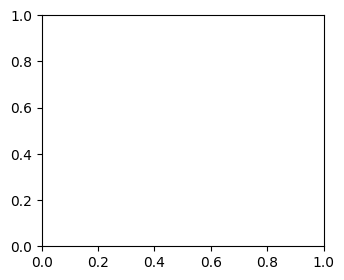

In [192]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_lay
plt.show

In [191]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.
